In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

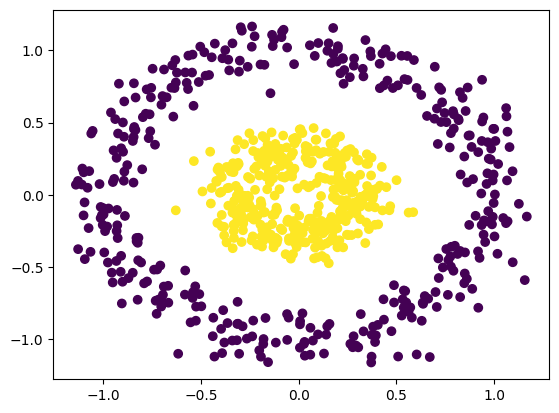

In [3]:
# Generate dataset for training unsupervised model
X, y = make_circles(n_samples=750, noise=0.1, factor=0.3)

# Convert the dataset to pandas df
df = pd.DataFrame(X)

# Visualize the data
plt.scatter(df[0], df[1], c=y)
plt.show()

## Using DBScan

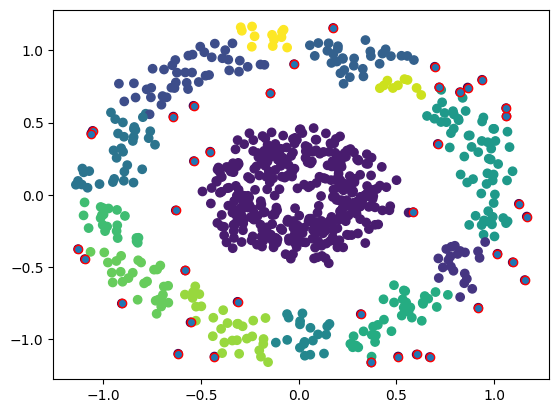

In [21]:
dbscan = DBSCAN(eps=0.1)
dbscan.fit(df)

# Identify index of outliers (outliers will havel label as -1)
index = np.where(dbscan.labels_ < 0)

# Draw scatter plot with outliers highlighted
plt.scatter(df[0], df[1], c=dbscan.labels_)
plt.scatter(df.iloc[index[0], 0], df.iloc[index[0], 1], edgecolors="r")
plt.show()

## Using Isolation Forest

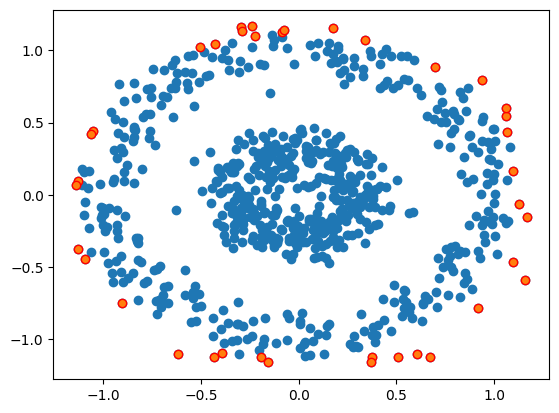

In [16]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05)
clf.fit(df)
predictions = clf.predict(df)

# Identify index of outliers (outliers will havel label as -1)
index = np.where(predictions < 0)

# Plot the data
plt.scatter(df[0], df[1])
plt.scatter(df.iloc[index[0], 0], df.iloc[index[0], 1], edgecolors="r")
plt.show()